In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
training_images = image_dataset_from_directory(
    "train",
    batch_size = 32,
    image_size = (128,128)
)

train_ratio = 0.85
validation_ratio = 0.15

Found 20000 files belonging to 2 classes.


In [4]:
dataset_size=len(training_images)
train_size=int(train_ratio*dataset_size)
validation_size=int(validation_ratio*dataset_size)

train_ds=training_images.take(train_size)
validation_ds=training_images.skip(train_size)

In [5]:
classes = training_images.class_names
classes


['cats', 'dogs']

In [6]:
len(training_images)

625

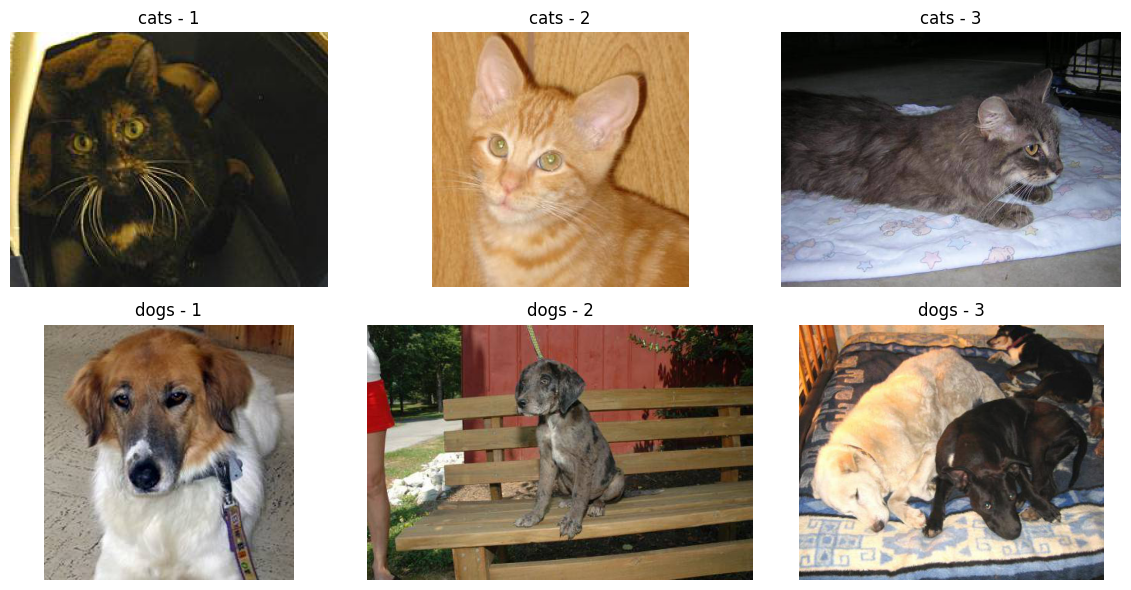

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing the images
directory = "train"

# Define the subdirectories (categories)
categories = ["cats", "dogs"]

# Number of sample images to print per category
num_samples = 3

# Create a plot to display images
fig, axes = plt.subplots(len(categories), num_samples, figsize=(12, 6))

# Loop through each category
for i, category in enumerate(categories):
    category_dir = os.path.join(directory, category)
    # Get list of image files in the category directory
    image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
    # Randomly select sample images
    sample_images = random.sample(image_files, num_samples)
    # Display the sample images
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_file)
        img = mpimg.imread(image_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"{category} - {j+1}")

plt.tight_layout()
plt.show()


In [8]:
model = Sequential([
    layers.Conv2D(32,(3,3),input_shape = (128,128,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3),padding = 'same', activation = 'relu'),
    # layers.Dropout(0.2),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.2),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding = 'same', activation = 'relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history=model.fit(train_ds, validation_data=validation_ds, epochs = 10)

Epoch 1/10
531/531 [==============================] - 41s 57ms/step - loss: 1.1990 - accuracy: 0.6348 - val_loss: 0.6172 - val_accuracy: 0.6679
Epoch 2/10
531/531 [==============================] - 30s 55ms/step - loss: 0.5451 - accuracy: 0.7242 - val_loss: 0.5753 - val_accuracy: 0.7055
Epoch 3/10
531/531 [==============================] - 31s 59ms/step - loss: 0.4619 - accuracy: 0.7801 - val_loss: 0.5440 - val_accuracy: 0.7317
Epoch 4/10
531/531 [==============================] - 28s 53ms/step - loss: 0.3875 - accuracy: 0.8236 - val_loss: 0.5712 - val_accuracy: 0.7407
Epoch 5/10
531/531 [==============================] - 33s 61ms/step - loss: 0.3228 - accuracy: 0.8575 - val_loss: 0.5797 - val_accuracy: 0.7241
Epoch 6/10
531/531 [==============================] - 28s 53ms/step - loss: 0.2678 - accuracy: 0.8891 - val_loss: 0.5983 - val_accuracy: 0.7301
Epoch 7/10
531/531 [==============================] - 42s 79ms/step - loss: 0.2490 - accuracy: 0.9003 - val_loss: 0.5988 - val_accuracy:

In [11]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    # shuffle=True,
    # seed=16,
    image_size=(128,128),
    batch_size=32
)

Found 5000 files belonging to 2 classes.


In [12]:
model.evaluate(test_ds)

157/157 [==============================] - 3s 17ms/step - loss: 0.8492 - accuracy: 0.7128


[0.8492215871810913, 0.7128000259399414]

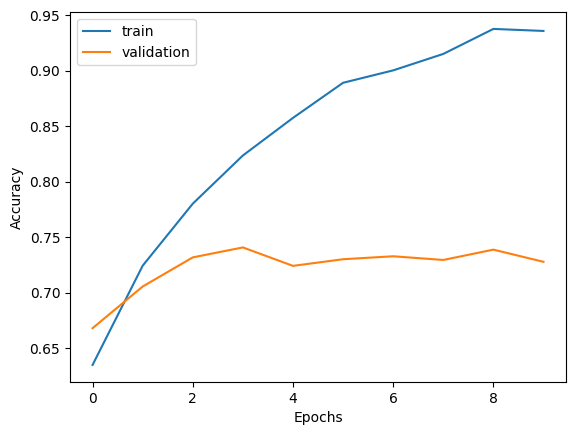

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

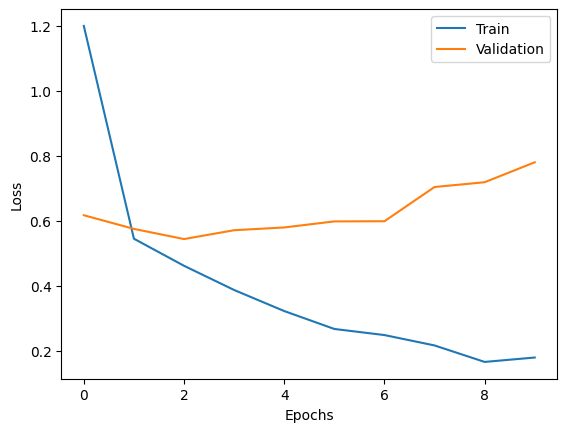

In [14]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

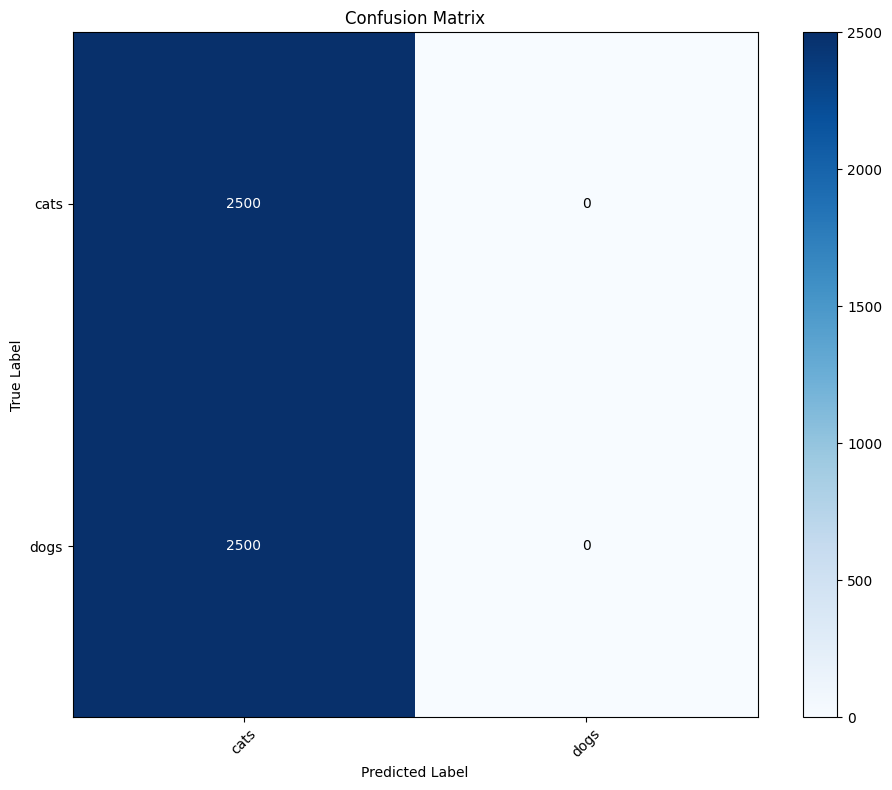

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=training_images.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

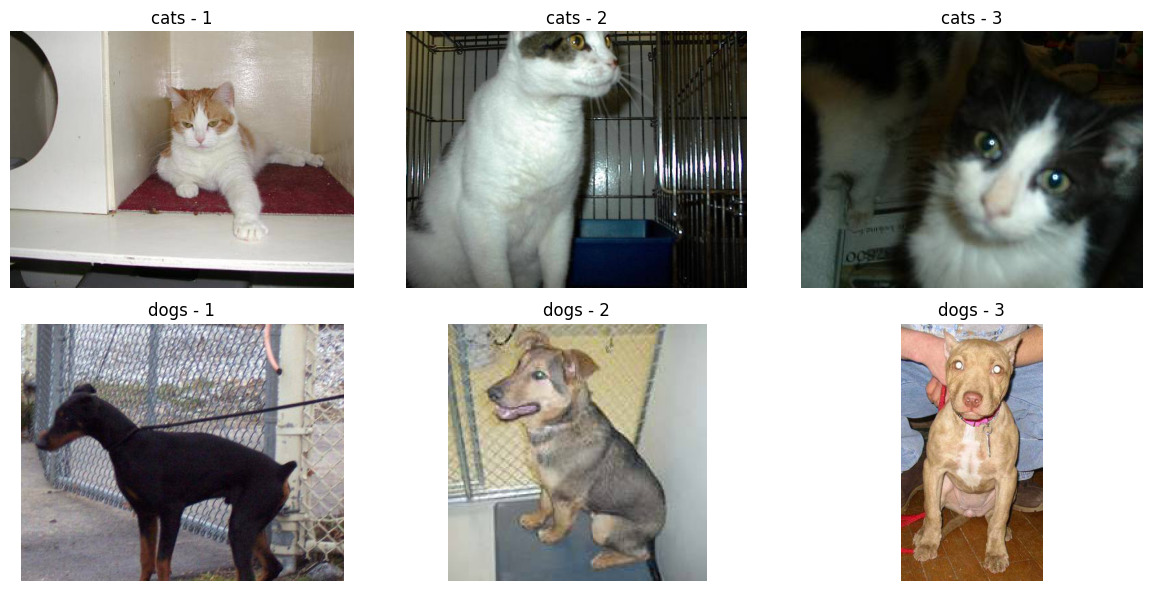

In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing the images
directory = "test"

# Define the subdirectories (categories)
categories = ["cats", "dogs"]

# Number of sample images to print per category
num_samples = 3

# Create a plot to display images
fig, axes = plt.subplots(len(categories), num_samples, figsize=(12, 6))

# Loop through each category
for i, category in enumerate(categories):
    category_dir = os.path.join(directory, category)
    # Get list of image files in the category directory
    image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
    # Randomly select sample images
    sample_images = random.sample(image_files, num_samples)
    # Display the sample images
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_file)
        img = mpimg.imread(image_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"{category} - {j+1}")

plt.tight_layout()
plt.show()


In [17]:
import tensorflow as tf

# Assuming you have defined test_ds and model

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    predicted_classes = tf.argmax(predictions, axis=1)
    
    # Convert TensorFlow tensors to numpy arrays for easier handling
    true_labels.extend(labels.numpy())
    predicted_labels.extend(predicted_classes.numpy())

# Print some sample predictions along with their true labels
num_samples_to_inspect = 10  # Specify the number of samples to inspect

print("Sample predictions:")
for i in range(num_samples_to_inspect):
    print("Sample", i+1)
    print("True label:", true_labels[i])
    print("Predicted label:", predicted_labels[i])
    print()  # Add a blank line for better readability


Sample predictions:
Sample 1
True label: 1
Predicted label: 0

Sample 2
True label: 1
Predicted label: 0

Sample 3
True label: 1
Predicted label: 0

Sample 4
True label: 1
Predicted label: 0

Sample 5
True label: 1
Predicted label: 0

Sample 6
True label: 1
Predicted label: 0

Sample 7
True label: 1
Predicted label: 0

Sample 8
True label: 0
Predicted label: 0

Sample 9
True label: 1
Predicted label: 0

Sample 10
True label: 0
Predicted label: 0

